# **Pontifícia Universidade Católica do Paraná**
### Disciplina: Técnicas de Machine Learning
### Aluna: Bruna Fernandes



---


###**Dataset**: NBA Players Stats
###**Fonte**: https://www.kaggle.com/drgilermo/nba-players-stats
###**Contexto**: A base de dados reune um conjunto de características individuais relacionadas ao desempenhos de jogadores de basquete durante 67 temporadas da NBA desde 1950 até 2017. O objetivo é ***prever o win share*** (ou seja, uma estimativa da quantidade de vitórias nas quais o jogador contribuiu).
###**Variáveis**
1. Ano
2. Posicao
3. Idade
4. Jogos
5. TrueShootingPercentage - Porcentagem de Arremesso Verdadeiro
6. FreeThrowRate - Taxa de Lances Livres
7. OffensiveWinShares - Participação Ofensiva nas Vitórias
8. DefensiveWinShares - Participação Defensiva nas Vitórias
9. WinShares - Participação nas Vitórias
10. FieldGoals - Arremessos de Campo
11. FieldGoalAttempts - Tentativas de Arremesso de Campo
12. FieldGoalPercentage - Porcentagem de Arremessos de Campo
13. TwoPointFieldGoals - Arremessos de Dois Pontos
14. TwoPointFieldGoalAttempts - Tentativas de Arremesso de Dois Pontos
15. TwoPointFieldGoalPercentage - Porcentagem de Arremessos de Dois Pontos
16. EffectiveFieldGoalPercentage - Porcentagem de Arremesso Eficaz de Campo
17. FreeThrows - Lances Livres
18. FreeThrowAttempts - Tentativas de Lances Livres
19. FreeThrowPercentage - Porcentagem de Lances Livres
20. Assists - Assistências
21. PersonalFouls - Faltas Pessoais
22. Points - Pontos


---



##**Importando as bibliotecas**

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import graphviz
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.tree import export_graphviz

##**Base de dados**

In [3]:
df_nba = pd.read_csv('/content/drive/MyDrive/Colab/Técnicas de Machine Learning/Datasets_AtividadeSomativa_Semana4/Semana4/nba_stats.csv')
df_nba

,Ano,Posicao,Idade,Jogos,TrueShootingPercentage,FreeThrowRate,OffensiveWinShares,DefensiveWinShares,WinShares,FieldGoals,...,TwoPointFieldGoals,TwoPointFieldGoalAttempts,TwoPointFieldGoalPercentage,EffectiveFieldGoalPercentage,FreeThrows,FreeThrowAttempts,FreeThrowPercentage,Assists,PersonalFouls,Points
0,1950,G-F,31.0,63,0.368,0.467,-0.1,3.6,3.5,144,...,144,516,0.279,0.279,170,241,0.705,176,217,458
1,1950,SG,29.0,49,0.435,0.387,1.6,0.6,2.2,102,...,102,274,0.372,0.372,75,106,0.708,109,99,279
2,1950,SF,25.0,67,0.394,0.259,0.9,2.8,3.6,174,...,174,499,0.349,0.349,90,129,0.698,140,192,438
3,1950,F,24.0,15,0.312,0.395,-0.5,-0.1,-0.6,22,...,22,86,0.256,0.256,19,34,0.559,20,29,63
4,1950,F,24.0,13,0.308,0.378,-0.5,-0.1,-0.6,21,...,21,82,0.256,0.256,17,31,0.548,20,27,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24619,2017,PF,24.0,62,0.604,0.442,3.4,2.2,5.6,253,...,253,442,0.572,0.571,133,196,0.679,99,189,639
24620,2017,C,27.0,51,0.508,0.247,0.5,0.6,1.0,78,...,78,157,0.497,0.494,22,39,0.564,42,61,178
24621,2017,C,20.0,19,0.346,0.161,-0.1,0.1,0.0,10,...,10,31,0.323,0.323,3,5,0.600,4,17,23
24622,2017,SF,22.0,44,0.503,0.181,-0.3,0.8,0.5,88,...,55,122,0.451,0.473,31,40,0.775,36,78,240


## **Análise exploratória dos dados**

---



In [4]:
df_nba.describe().transpose().round(1)

,count,mean,std,min,25%,50%,75%,max
Ano,24624.0,1992.6,17.4,1950.0,1981.0,1996.0,2007.0,2017.0
Idade,24616.0,26.7,3.8,18.0,24.0,26.0,29.0,44.0
Jogos,24624.0,50.8,26.5,1.0,27.0,58.0,75.0,88.0
TrueShootingPercentage,24538.0,0.5,0.1,0.0,0.5,0.5,0.5,1.1
FreeThrowRate,24525.0,0.3,0.2,0.0,0.2,0.3,0.4,6.0
OffensiveWinShares,24585.0,1.3,2.1,-5.1,-0.1,0.4,1.9,18.3
DefensiveWinShares,24585.0,1.2,1.3,-1.0,0.2,0.8,1.8,16.0
WinShares,24585.0,2.5,3.1,-2.8,0.2,1.4,3.8,25.4
FieldGoals,24624.0,195.3,188.1,0.0,41.0,141.0,299.0,1597.0
FieldGoalAttempts,24624.0,430.6,397.6,0.0,99.0,321.0,661.0,3159.0


In [5]:
df_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24624 entries, 0 to 24623
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ano                           24624 non-null  int64  
 1   Posicao                       24624 non-null  object 
 2   Idade                         24616 non-null  float64
 3   Jogos                         24624 non-null  int64  
 4   TrueShootingPercentage        24538 non-null  float64
 5   FreeThrowRate                 24525 non-null  float64
 6   OffensiveWinShares            24585 non-null  float64
 7   DefensiveWinShares            24585 non-null  float64
 8   WinShares                     24585 non-null  float64
 9   FieldGoals                    24624 non-null  int64  
 10  FieldGoalAttempts             24624 non-null  int64  
 11  FieldGoalPercentage           24525 non-null  float64
 12  TwoPointFieldGoals            24624 non-null  int64  
 13  T

In [6]:
df_nba["Posicao"].value_counts()

PF       4966
SG       4811
C        4759
SF       4699
PG       4648
G         139
F         123
F-C        81
G-F        79
F-G        60
C-F        35
C-PF       33
SF-SG      30
PG-SG      28
SG-PG      27
PF-C       27
SG-SF      26
PF-SF      25
SF-PF      21
SG-PF       3
C-SF        2
SF-PG       1
PG-SF       1
Name: Posicao, dtype: int64

**Conversão da variável 'Posicao' para dados do tipo int**

**Obs**: As combinações, como "F-C," "G-F," "C-PF," "SF-SG," "PG-SG,".., representam jogadores que podem desempenhar papéis em mais de uma posição. Para diminuar a quantidade de classificações possíveis, foram definidas as posições únicas e a partir dela os jogadores foram classificados.

Se um jogar ocupar mais de uma posição, exemplo: SG-PG, o resultado seria:

*   PF = 0
*   SG = 1
*   C = 0
*   SF = 0
*   PG = 1
*   G = 0
*   F = 0

In [ ]:
posicoes_unicas = ['PF', 'SG', 'C', 'SF', 'PG', 'G', 'F']
df_nba_encoded = pd.DataFrame(columns=posicoes_unicas)

for index, row in df_nba.iterrows():
    posicoes_jogador = row['Posicao'].split('-')  #Dividir se houver múltiplas posições

    # Criar uma série com 0s para todas as posições únicas
    jogador_encoded = pd.Series(0, index=posicoes_unicas)

    # Defina 1 nas colunas correspondentes às posições do jogador
    for posicao in posicoes_jogador:
        jogador_encoded[posicao] = 1
    df_nba_encoded = df_nba_encoded.append(jogador_encoded, ignore_index=True)

#df_nba_encoded = df_nba_encoded.fillna(0).astype(int)

In [8]:
df_nba = pd.concat([df_nba, df_nba_encoded], axis=1)
df_nba

,Ano,Posicao,Idade,Jogos,TrueShootingPercentage,FreeThrowRate,OffensiveWinShares,DefensiveWinShares,WinShares,FieldGoals,...,Assists,PersonalFouls,Points,PF,SG,C,SF,PG,G,F
0,1950,G-F,31.0,63,0.368,0.467,-0.1,3.6,3.5,144,...,176,217,458,0,0,0,0,0,1,1
1,1950,SG,29.0,49,0.435,0.387,1.6,0.6,2.2,102,...,109,99,279,0,1,0,0,0,0,0
2,1950,SF,25.0,67,0.394,0.259,0.9,2.8,3.6,174,...,140,192,438,0,0,0,1,0,0,0
3,1950,F,24.0,15,0.312,0.395,-0.5,-0.1,-0.6,22,...,20,29,63,0,0,0,0,0,0,1
4,1950,F,24.0,13,0.308,0.378,-0.5,-0.1,-0.6,21,...,20,27,59,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24619,2017,PF,24.0,62,0.604,0.442,3.4,2.2,5.6,253,...,99,189,639,1,0,0,0,0,0,0
24620,2017,C,27.0,51,0.508,0.247,0.5,0.6,1.0,78,...,42,61,178,0,0,1,0,0,0,0
24621,2017,C,20.0,19,0.346,0.161,-0.1,0.1,0.0,10,...,4,17,23,0,0,1,0,0,0,0
24622,2017,SF,22.0,44,0.503,0.181,-0.3,0.8,0.5,88,...,36,78,240,0,0,0,1,0,0,0


In [9]:
df_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24624 entries, 0 to 24623
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ano                           24624 non-null  int64  
 1   Posicao                       24624 non-null  object 
 2   Idade                         24616 non-null  float64
 3   Jogos                         24624 non-null  int64  
 4   TrueShootingPercentage        24538 non-null  float64
 5   FreeThrowRate                 24525 non-null  float64
 6   OffensiveWinShares            24585 non-null  float64
 7   DefensiveWinShares            24585 non-null  float64
 8   WinShares                     24585 non-null  float64
 9   FieldGoals                    24624 non-null  int64  
 10  FieldGoalAttempts             24624 non-null  int64  
 11  FieldGoalPercentage           24525 non-null  float64
 12  TwoPointFieldGoals            24624 non-null  int64  
 13  T

In [11]:
print('Colunas         \t      Porcentagem')
(df_nba.isnull().sum() / df_nba.shape[0]*100).sort_values(ascending=False).round(2)

Colunas         	      Porcentagem


FreeThrowPercentage             3.48
TwoPointFieldGoalPercentage     0.52
FreeThrowRate                   0.40
FieldGoalPercentage             0.40
EffectiveFieldGoalPercentage    0.40
TrueShootingPercentage          0.35
OffensiveWinShares              0.16
DefensiveWinShares              0.16
WinShares                       0.16
Idade                           0.03
PF                              0.00
PersonalFouls                   0.00
Points                          0.00
SF                              0.00
SG                              0.00
C                               0.00
G                               0.00
Assists                         0.00
PG                              0.00
Ano                             0.00
FreeThrowAttempts               0.00
FreeThrows                      0.00
Posicao                         0.00
TwoPointFieldGoalAttempts       0.00
TwoPointFieldGoals              0.00
FieldGoalAttempts               0.00
FieldGoals                      0.00
J

In [12]:
#excluir a coluna posição porque o IterativeImputer não aceita valores do tipo string e essa informação já está em outras colunas
df_nba = df_nba.drop(['Posicao'], axis=1)

Tratando valores ausentes utilizando a imputação de características multivariadas

In [13]:
imputer = IterativeImputer(max_iter=10, random_state=0)

df_nba_imputed = pd.DataFrame(imputer.fit_transform(df_nba), columns=df_nba.columns)
df_nba = df_nba_imputed
print('Colunas         \t      Porcentagem')
(df_nba.isnull().sum() / df_nba.shape[0]*100).sort_values(ascending=False).round(2)

Colunas         	      Porcentagem


Ano                             0.0
Idade                           0.0
G                               0.0
PG                              0.0
SF                              0.0
C                               0.0
SG                              0.0
PF                              0.0
Points                          0.0
PersonalFouls                   0.0
Assists                         0.0
FreeThrowPercentage             0.0
FreeThrowAttempts               0.0
FreeThrows                      0.0
EffectiveFieldGoalPercentage    0.0
TwoPointFieldGoalPercentage     0.0
TwoPointFieldGoalAttempts       0.0
TwoPointFieldGoals              0.0
FieldGoalPercentage             0.0
FieldGoalAttempts               0.0
FieldGoals                      0.0
WinShares                       0.0
DefensiveWinShares              0.0
OffensiveWinShares              0.0
FreeThrowRate                   0.0
TrueShootingPercentage          0.0
Jogos                           0.0
F                           

In [ ]:
# separar a coluna a ser prevista
##df_nba2 = df_nba.drop('WinShares', axis=1)



---

##**Separando os dados de treino e teste**

In [14]:
df_nba

,Ano,Idade,Jogos,TrueShootingPercentage,FreeThrowRate,OffensiveWinShares,DefensiveWinShares,WinShares,FieldGoals,FieldGoalAttempts,...,Assists,PersonalFouls,Points,PF,SG,C,SF,PG,G,F
0,1950.0,31.0,63.0,0.368,0.467,-0.1,3.6,3.5,144.0,516.0,...,176.0,217.0,458.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1950.0,29.0,49.0,0.435,0.387,1.6,0.6,2.2,102.0,274.0,...,109.0,99.0,279.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1950.0,25.0,67.0,0.394,0.259,0.9,2.8,3.6,174.0,499.0,...,140.0,192.0,438.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1950.0,24.0,15.0,0.312,0.395,-0.5,-0.1,-0.6,22.0,86.0,...,20.0,29.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1950.0,24.0,13.0,0.308,0.378,-0.5,-0.1,-0.6,21.0,82.0,...,20.0,27.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24619,2017.0,24.0,62.0,0.604,0.442,3.4,2.2,5.6,253.0,443.0,...,99.0,189.0,639.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
24620,2017.0,27.0,51.0,0.508,0.247,0.5,0.6,1.0,78.0,158.0,...,42.0,61.0,178.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
24621,2017.0,20.0,19.0,0.346,0.161,-0.1,0.1,0.0,10.0,31.0,...,4.0,17.0,23.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
24622,2017.0,22.0,44.0,0.503,0.181,-0.3,0.8,0.5,88.0,221.0,...,36.0,78.0,240.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [15]:
# Separando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(df_nba.drop('WinShares', axis=1),
                                                    df_nba['WinShares'],
                                                    test_size=0.25,
                                                    random_state=0)


In [19]:
X_train

,Ano,Idade,Jogos,TrueShootingPercentage,FreeThrowRate,OffensiveWinShares,DefensiveWinShares,FieldGoals,FieldGoalAttempts,FieldGoalPercentage,...,Assists,PersonalFouls,Points,PF,SG,C,SF,PG,G,F
618,1953.0,28.0,71.0,0.421,0.250,1.1,3.5,402.0,1034.0,0.389,...,277.0,245.0,967.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10641,1992.0,25.0,9.0,0.289,0.475,-0.3,0.1,10.0,40.0,0.250,...,13.0,18.0,28.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
22432,2014.0,23.0,60.0,0.507,0.136,0.4,1.1,147.0,376.0,0.391,...,52.0,67.0,404.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
23673,2016.0,20.0,79.0,0.541,0.129,-0.1,1.0,181.0,418.0,0.433,...,109.0,124.0,478.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11443,1994.0,23.0,16.0,0.384,0.327,-0.2,0.1,17.0,49.0,0.347,...,8.0,9.0,43.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,1997.0,22.0,13.0,0.609,0.204,0.2,0.0,23.0,49.0,0.469,...,18.0,16.0,65.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19648,2009.0,28.0,80.0,0.567,0.169,2.4,2.5,222.0,474.0,0.468,...,95.0,133.0,577.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9845,1990.0,22.0,42.0,0.439,0.163,0.0,0.4,37.0,86.0,0.430,...,20.0,70.0,81.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10799,1992.0,24.0,61.0,0.495,0.538,0.7,1.2,141.0,331.0,0.426,...,53.0,241.0,405.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


##**Redução da dimensionalidade e Extração de atributos pela função PCA**

---



###Dados de Treino

In [20]:
scaler = StandardScaler()
df_nba_scaled_train = scaler.fit_transform(X_train)
df_nba_scaled_train

array([[-2.27695418,  0.3450481 ,  0.7576511 , ..., -0.48807434,
        -0.10594754, -0.12652764],
       [-0.03611467, -0.43683583, -1.58137203, ..., -0.48807434,
        -0.10594754, -0.12652764],
       [ 1.22794864, -0.95809179,  0.34266312, ..., -0.48807434,
        -0.10594754, -0.12652764],
       ...,
       [-0.15102952, -1.21871977, -0.33640811, ..., -0.48807434,
        -0.10594754, -0.12652764],
       [-0.03611467, -0.69746381,  0.3803893 , ..., -0.48807434,
        -0.10594754, -0.12652764],
       [-1.35763541,  0.86630405, -0.07232485, ..., -0.48807434,
        -0.10594754, -0.12652764]])

A quantidade de componentes inicialmente escolhida foi 21 para representar todos os atributos, a partir disso foi possível identificar no gráfico onde seria o ponto de inflexão e definir qual seria a quantidade de atributos principais, esse valor ficou em 15, a partir disso a quantidade de atributos não tem mais tanta influência.

In [22]:
n_components = 15
pca = PCA(n_components=n_components)
pca_decomp = pca.fit(df_nba_scaled_train)

# Tranformação dos dados originais em componentes principais
pca_df_nba_train = pca_decomp.transform(df_nba_scaled_train)

# Novo dataframe com os componentes principais
pca_df_nba_train = pd.DataFrame(data=pca_df_nba_train, columns=[f'Component_{i}' for i in range(n_components)])

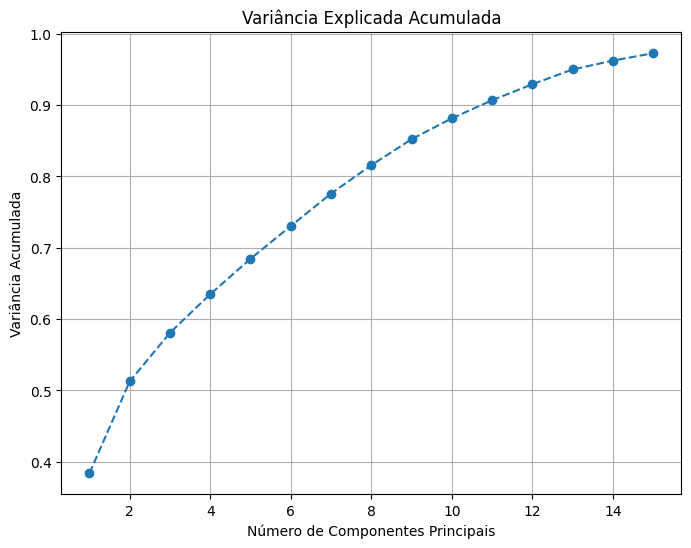

In [23]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.title('Variância Explicada Acumulada')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Acumulada')
plt.grid()
plt.show()

In [35]:
X_train = pca_df_nba_train
X_train

,Component_0,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9,Component_10,Component_11,Component_12,Component_13,Component_14
0,3.286523,-2.786547,0.588385,-0.530515,-1.068215,0.611965,-1.786252,-0.459042,-0.527850,-1.370328,1.433971,-0.036295,0.016156,0.537040,0.815472
1,-4.501407,-2.730396,1.127283,-1.850980,0.380981,1.321099,1.256302,0.696400,0.627579,0.689845,0.370851,-0.308291,-0.013246,0.086304,-0.151607
2,-1.136704,0.599455,-0.980856,-0.507254,-1.542792,0.611365,-1.733738,0.039138,-0.534863,0.737522,-0.810168,0.691656,-0.350565,0.120866,-0.092405
3,-0.181411,1.298585,-1.191816,-0.176164,-1.735293,0.759036,-1.730230,0.332167,-1.330233,0.342614,-1.420724,1.222223,-0.473628,-0.191232,-0.270371
4,-3.758572,-0.881643,0.698652,-1.207175,-0.038715,1.463527,1.255662,0.621989,-0.101792,0.551377,-0.261789,-0.572174,0.159868,0.191252,-0.128008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18463,-2.604273,2.258473,-1.296124,1.188592,1.031612,0.667686,-0.256908,1.293154,-0.912458,0.331236,-0.081000,-0.870143,0.347482,0.129693,0.374815
18464,0.979746,1.619923,-0.834025,-0.152042,-1.326454,0.555614,-1.759250,-1.035939,-0.036649,0.194602,-0.312145,0.934378,-0.469855,0.757667,-0.119270
18465,-2.737211,0.266874,1.393733,-0.595163,0.652534,-1.150469,-0.667692,0.254057,-1.730414,0.427703,-0.219241,-0.519335,0.405813,0.175478,-0.561325
18466,0.007102,-0.013402,1.834648,-0.443609,0.874334,-1.212798,-0.534699,0.455717,-0.453221,-0.558319,-0.978300,0.871219,0.033248,-0.306786,-0.448705


###Dados de Teste

In [32]:
scaler = StandardScaler()
df_nba_scaled_test = scaler.fit_transform(X_test)
df_nba_scaled_test

array([[ 0.20028156,  0.09646629,  0.54431268, ...,  2.0841665 ,
        -0.10954751, -0.11972947],
       [ 0.25741206, -1.71982132,  1.18677648, ..., -0.47980812,
        -0.10954751, -0.11972947],
       [ 0.20028156,  0.35593594,  0.20418478, ..., -0.47980812,
        -0.10954751, -0.11972947],
       ...,
       [ 1.34289151, -1.71982132, -1.1563268 , ..., -0.47980812,
        -0.10954751, -0.11972947],
       [-0.7709369 , -0.16300337,  0.31756075, ..., -0.47980812,
        -0.10954751, -0.11972947],
       [ 0.02889006,  0.87487526, -0.43827902, ..., -0.47980812,
        -0.10954751, -0.11972947]])

In [33]:
n_components = 15
pca = PCA(n_components=n_components)
pca_decomp = pca.fit(df_nba_scaled_test)

# Tranformação dos dados originais em componentes principais
pca_df_nba_test = pca_decomp.transform(df_nba_scaled_test)

# Novo dataframe com os componentes principais
pca_df_nba_test = pd.DataFrame(data=pca_df_nba_test, columns=[f'Component_{i}' for i in range(n_components)])

In [36]:
X_test = pca_df_nba_test
X_test

,Component_0,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9,Component_10,Component_11,Component_12,Component_13,Component_14
0,0.745287,-0.149834,-1.790702,0.681843,1.250516,0.373755,0.263001,0.232731,-0.337539,-0.174915,-0.552799,-0.082226,0.011387,-0.521868,0.131267
1,4.660237,-1.703678,0.917779,-1.444153,-0.453569,1.731744,-0.759805,-0.146403,-1.828906,0.260462,-0.684024,0.220516,-0.165971,-1.637093,0.872384
2,0.959254,0.410787,-1.133394,-0.014270,-1.016995,-0.906109,-1.425978,-0.665850,0.218161,0.258974,0.579935,0.233800,-0.153634,0.509290,-0.066853
3,2.873845,-0.038316,1.058652,-0.546950,-0.367211,1.748496,-0.632531,-0.799093,-0.913839,-0.755564,-0.083143,-0.408085,0.026390,0.643325,0.072973
4,0.696988,0.118374,-0.635795,0.220421,-1.410789,-0.785635,-1.579347,0.053559,-0.716750,-1.109630,-0.274021,0.732013,-0.290005,-0.275172,-0.296302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6151,-1.261837,0.960393,-0.564059,-0.481121,-1.431745,0.012552,1.827773,0.631482,-0.202592,0.685029,-0.881023,0.833840,-0.338215,0.105289,0.094707
6152,-1.239365,0.892920,-0.826619,-0.161395,-1.141265,-0.860542,-1.496257,-0.012817,-0.010425,0.417786,0.382960,0.466529,-0.170321,-0.202206,0.368392
6153,-3.308085,0.234351,-0.996190,-0.483326,-1.699256,0.064685,1.793650,0.959178,-0.497054,0.860734,-1.616499,0.112619,-0.108984,0.538790,0.097603
6154,3.955438,-0.442661,-0.632594,0.217864,-1.274966,-0.855500,-1.577889,0.036152,-0.154798,-0.129858,0.784080,-0.492497,0.138211,0.068866,0.744603



### **Visualização de como as variáveis foram agrupadas em componentes principais**


In [29]:
# Obtém os vetores de peso (loadings) para os primeiros 'n_components' componentes principais
loadings = pca.components_[:n_components]
# Datasete para visualizar os loadings
loadings_df = pd.DataFrame(loadings, columns=X_train.columns)
loadings_df

,Ano,Idade,Jogos,TrueShootingPercentage,FreeThrowRate,OffensiveWinShares,DefensiveWinShares,FieldGoals,FieldGoalAttempts,FieldGoalPercentage,...,Assists,PersonalFouls,Points,PF,SG,C,SF,PG,G,F
0,-0.036262,0.010193,0.246417,0.156164,0.016495,0.252252,0.243206,0.299772,0.295613,0.144005,...,0.225229,0.258940,0.301140,0.003481,0.006144,-0.009097,0.008354,0.001567,-0.028626,-0.032203
1,0.234853,0.032204,-0.018962,0.433499,0.064314,-0.003849,-0.048990,-0.082651,-0.112992,0.442992,...,-0.100131,-0.057425,-0.085230,0.056378,-0.032176,0.065143,0.000122,-0.043848,-0.130964,-0.135627
2,-0.257618,-0.079416,-0.000622,-0.018847,0.349372,-0.017955,0.111744,-0.024867,-0.046856,0.116889,...,-0.252179,0.141096,-0.032083,0.217046,-0.254100,0.416739,-0.056352,-0.404763,0.200384,0.257048
3,-0.279295,-0.004407,-0.049525,0.163397,0.053997,0.046104,-0.097964,-0.040191,-0.028360,0.097739,...,0.136549,-0.074784,-0.029423,-0.283830,0.056003,-0.088643,-0.102180,0.235159,0.544434,0.542474
4,0.089694,0.153328,0.012235,-0.036262,0.146737,0.026453,0.087345,-0.042520,-0.046628,-0.013197,...,0.224632,0.031491,-0.036514,-0.004670,-0.379675,0.325329,-0.494067,0.587773,-0.113336,-0.072646
5,-0.057590,-0.096164,0.008191,0.015979,-0.020775,-0.024216,0.008070,-0.013673,-0.008785,0.015341,...,0.028372,0.019879,-0.015958,0.584169,-0.525476,-0.511289,0.218449,0.194187,0.125490,0.050145
6,-0.007795,-0.007108,-0.027120,0.013858,0.062394,0.006728,-0.022143,0.001885,0.004142,-0.003419,...,-0.013446,-0.019657,0.005717,0.506412,0.473546,-0.223628,-0.668247,-0.108764,0.048041,0.015084
7,-0.081399,-0.703568,-0.150022,0.040568,0.508206,0.076363,-0.152999,-0.010651,-0.017064,0.011998,...,0.061064,-0.125435,0.013603,-0.138904,0.103349,-0.134334,0.039375,0.174523,-0.160993,-0.146589
8,0.129058,0.558897,-0.264059,0.071333,0.553514,0.260810,-0.072642,-0.010821,-0.024700,-0.110590,...,-0.030770,-0.217681,0.038676,0.041811,-0.013342,-0.088840,0.153110,-0.082679,-0.015553,-0.036317
9,0.682358,-0.161634,-0.198611,-0.075103,-0.170387,0.245027,0.034568,0.097531,0.060110,-0.052925,...,0.033436,-0.220878,0.113053,-0.006974,-0.026100,0.005357,-0.017269,-0.043952,0.334537,0.189840


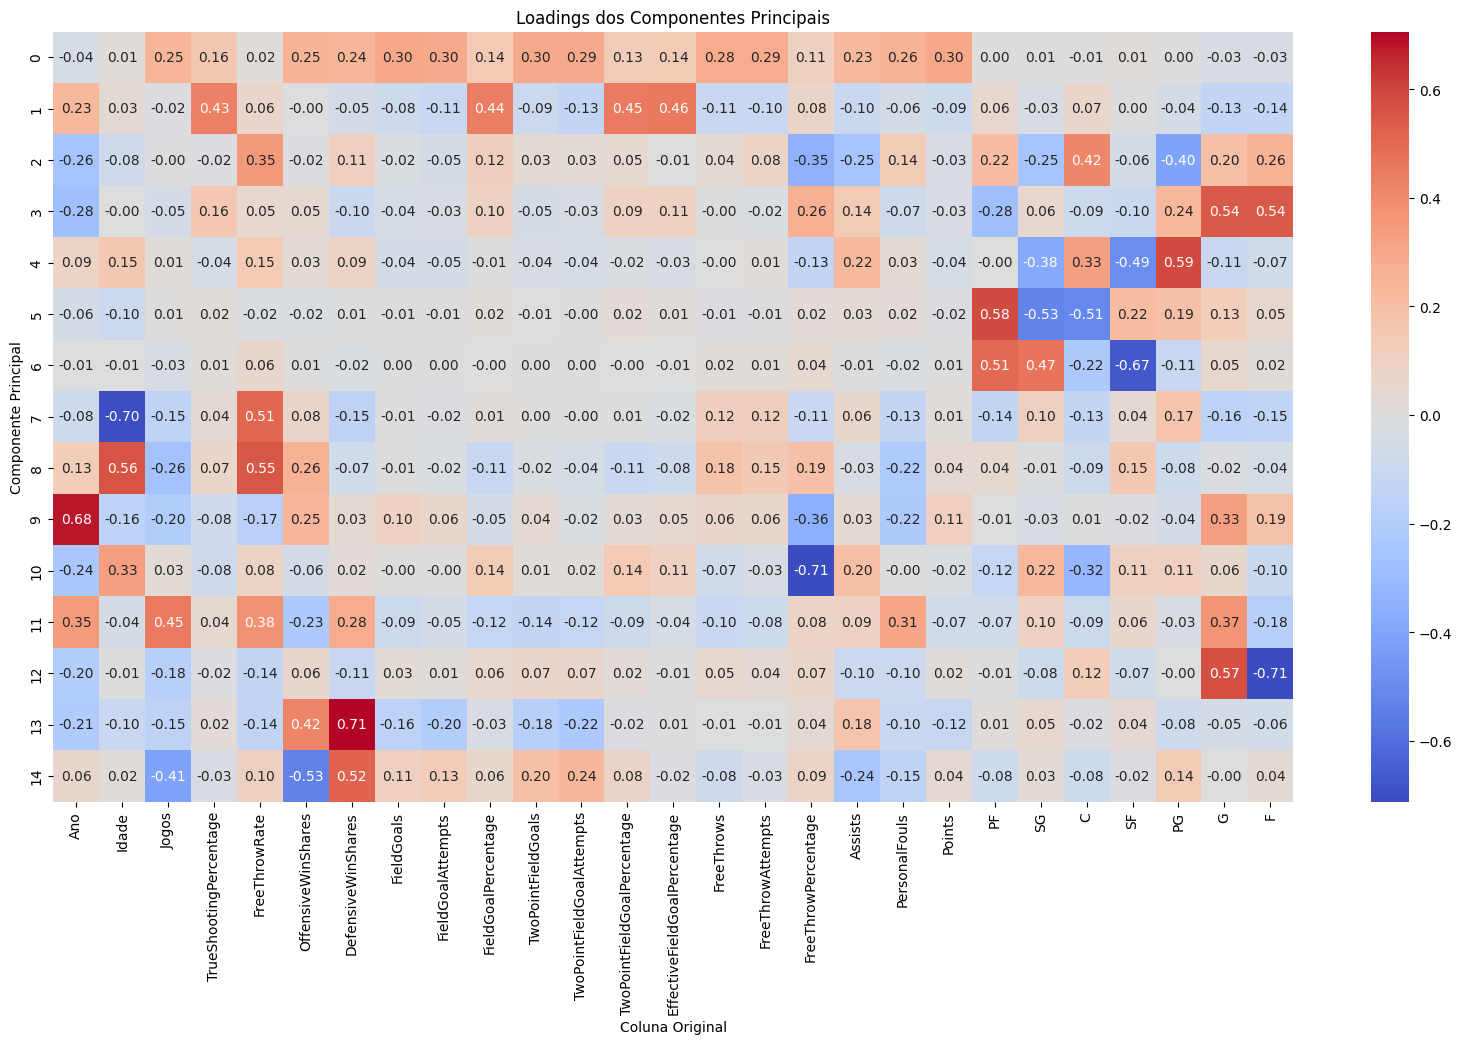

In [30]:
# heatmap dos loadings de todas as colunas originais em relação a todos os componentes principais
plt.figure(figsize=(20, 10))
sns.heatmap(loadings_df.iloc[:n_components, :], annot=True, fmt=".2f", cmap="coolwarm")
plt.xlabel('Coluna Original')
plt.ylabel('Componente Principal')
plt.title('Loadings dos Componentes Principais')
plt.show()

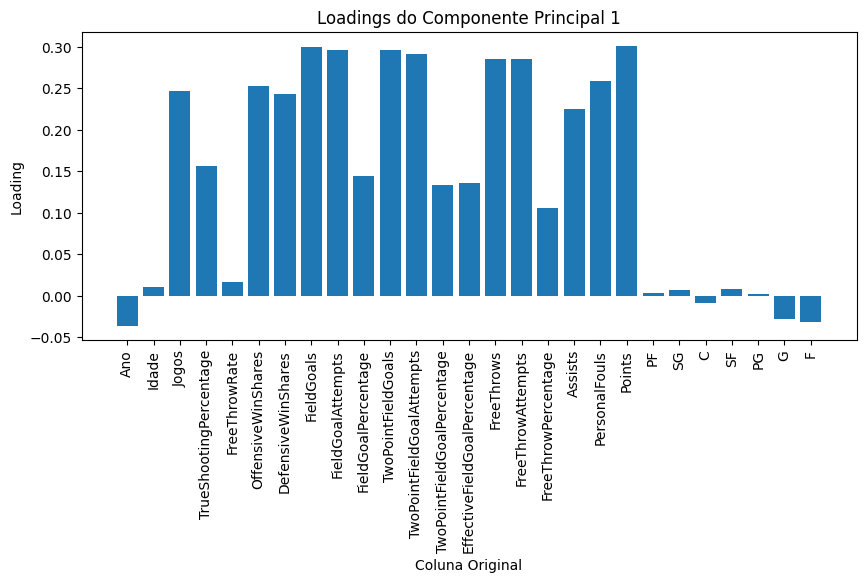

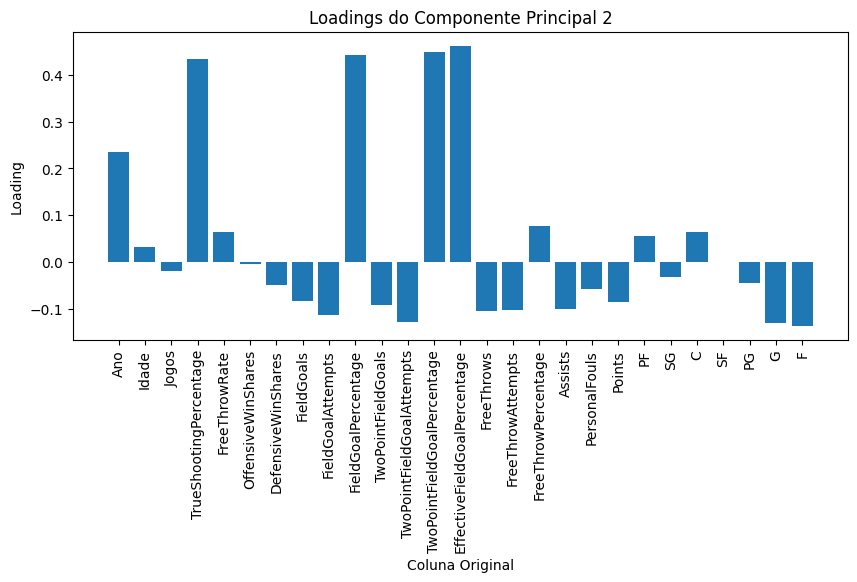

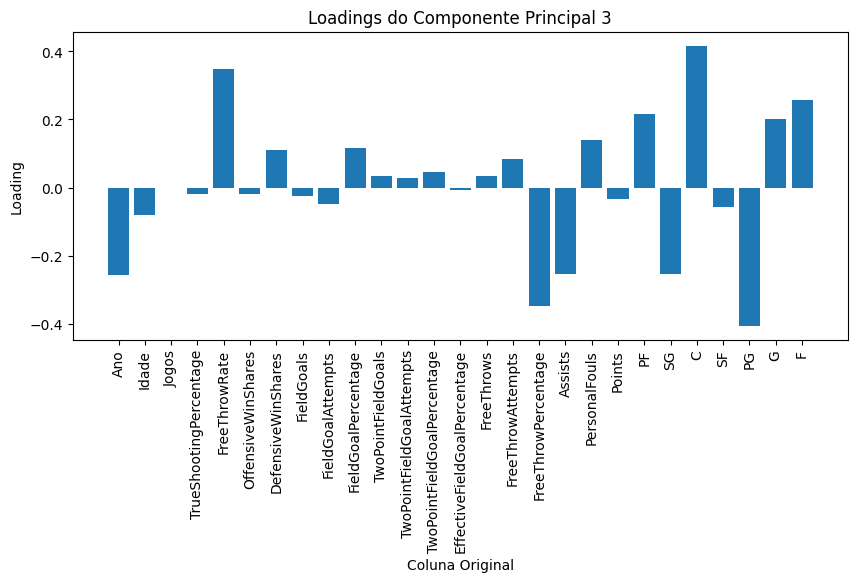

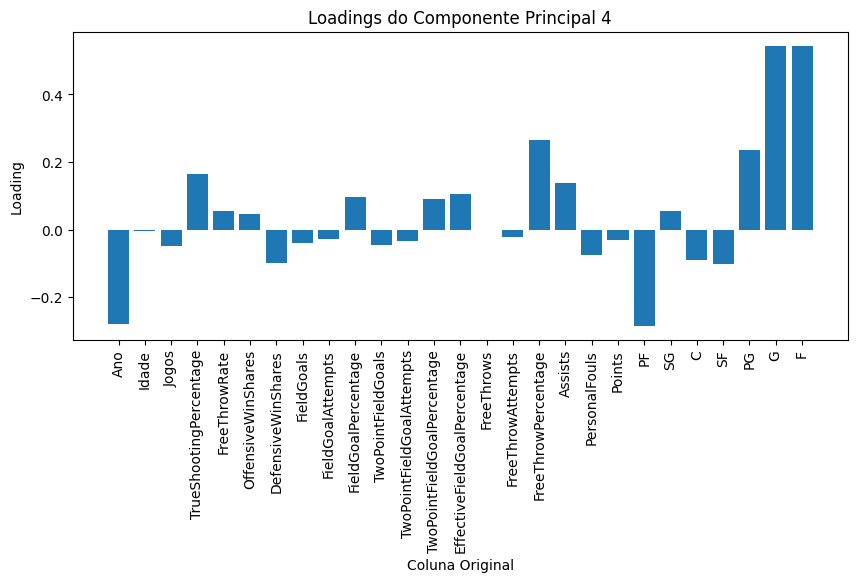

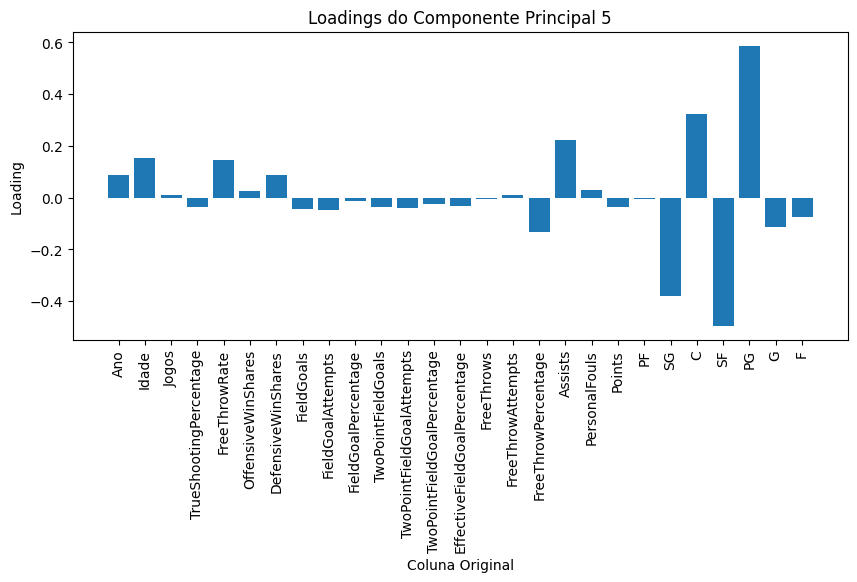

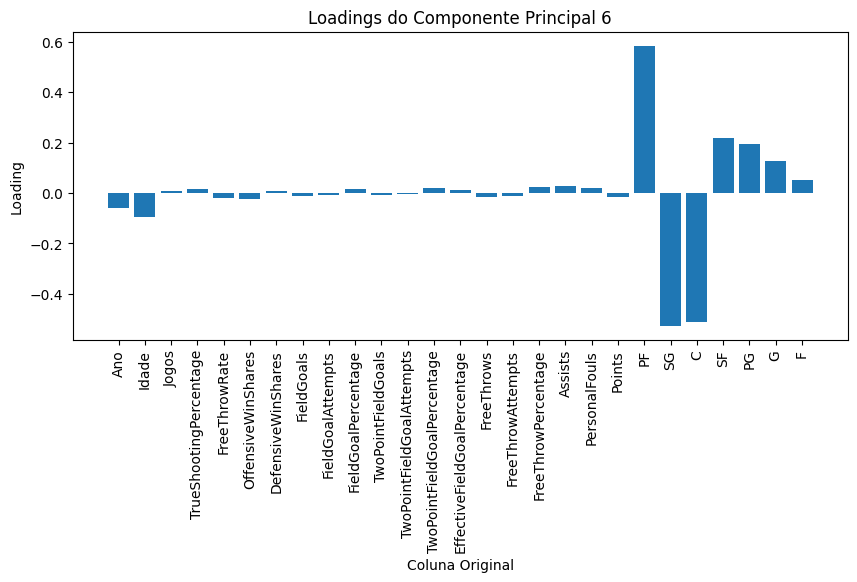

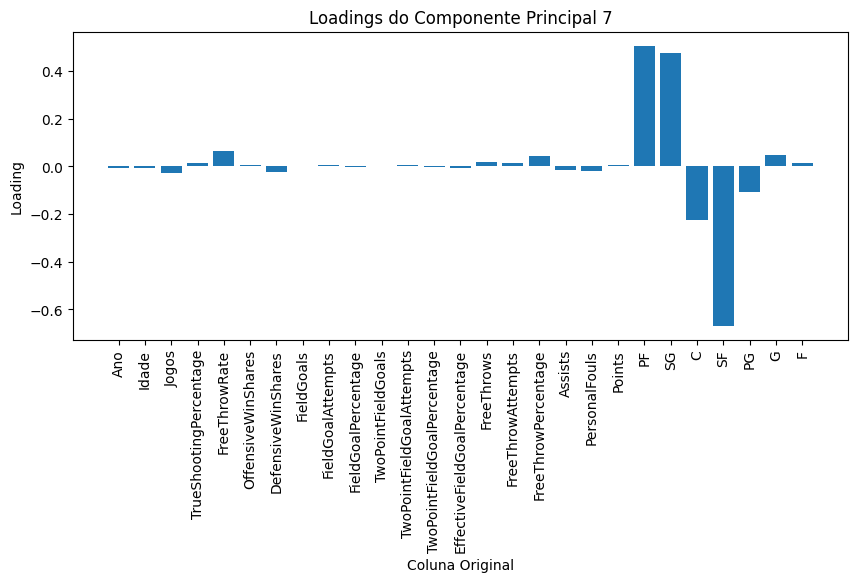

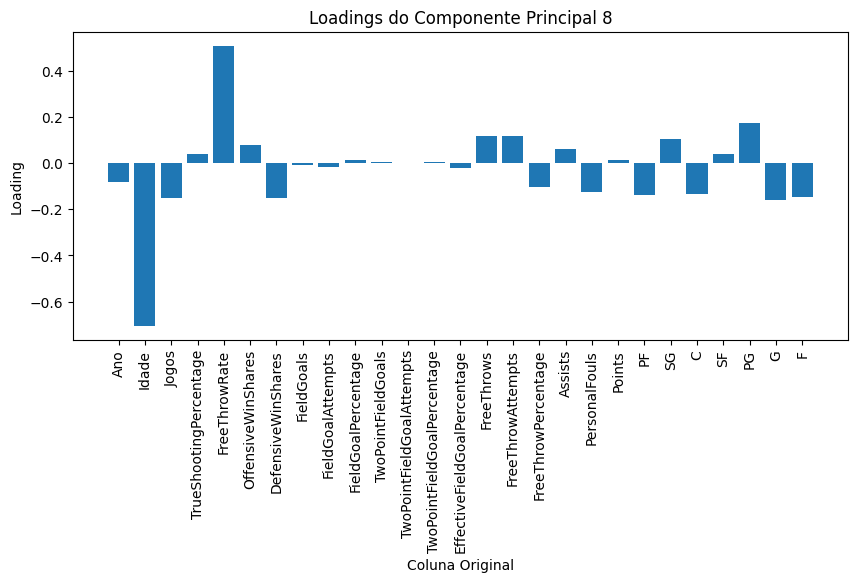

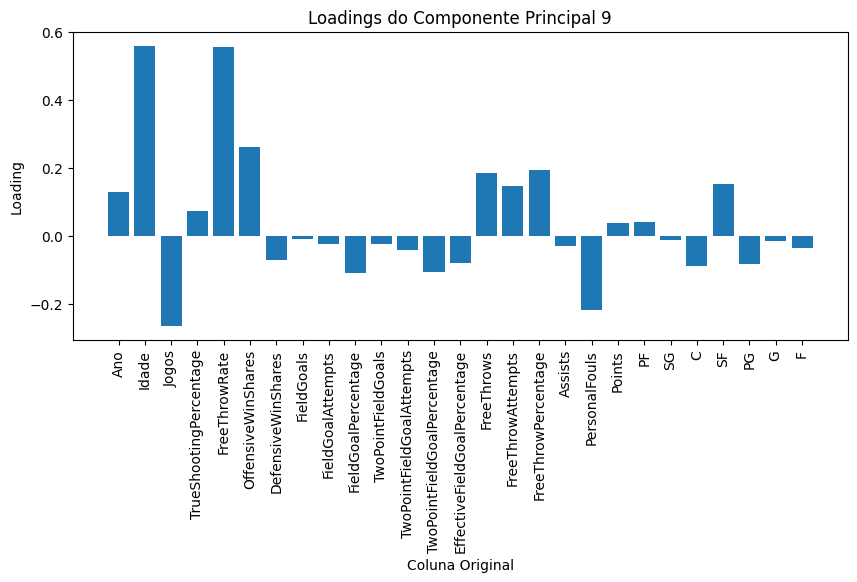

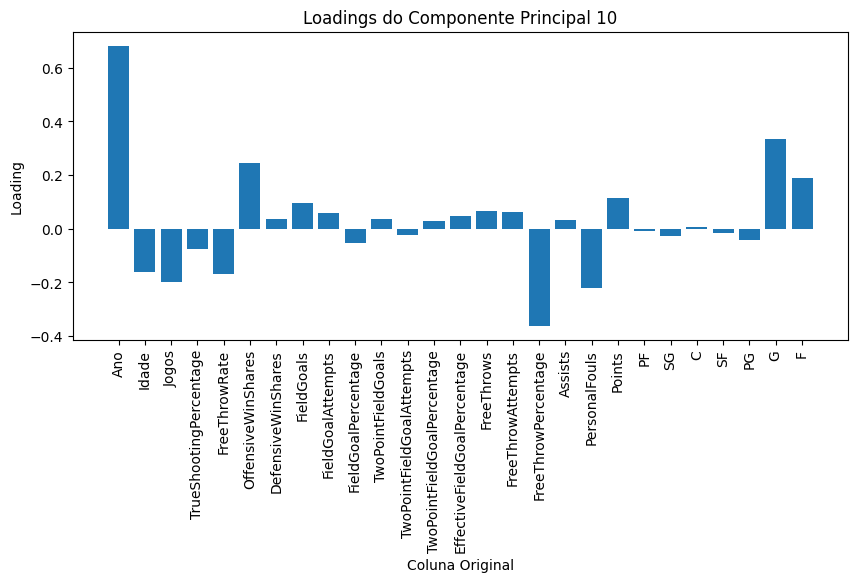

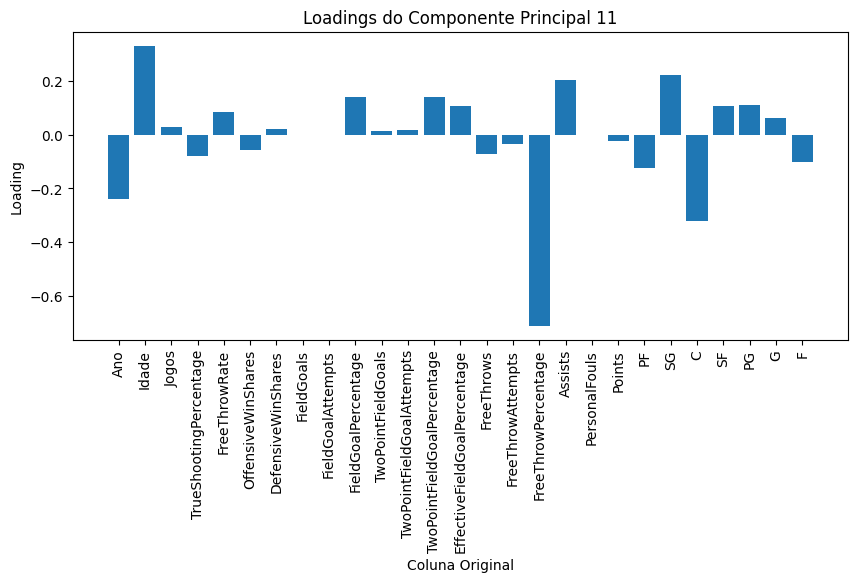

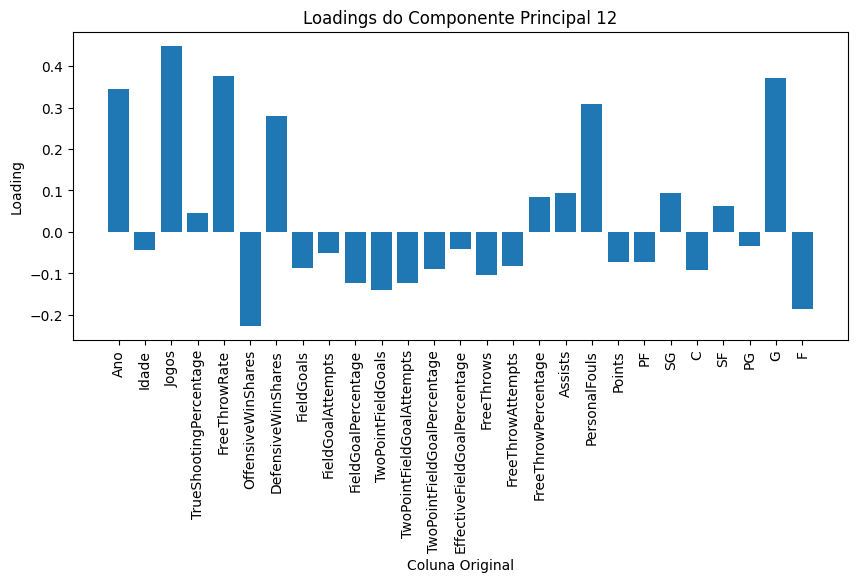

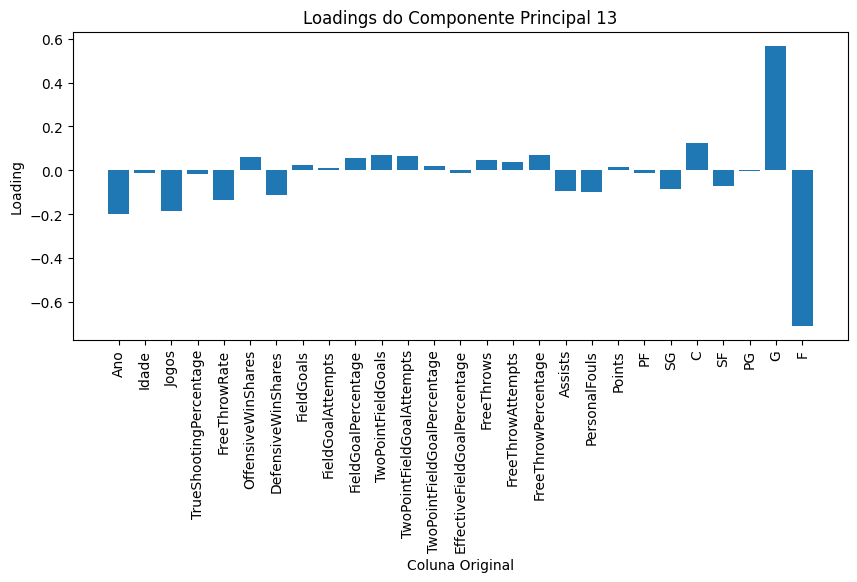

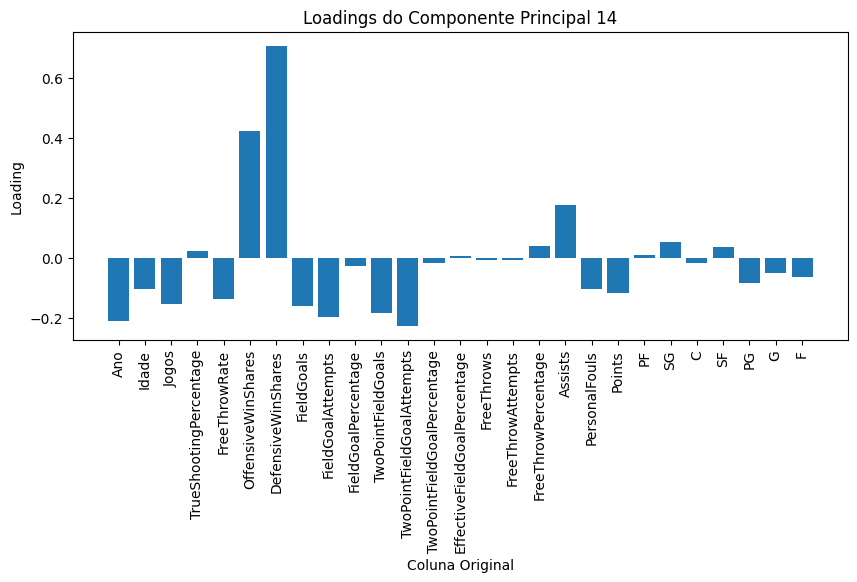

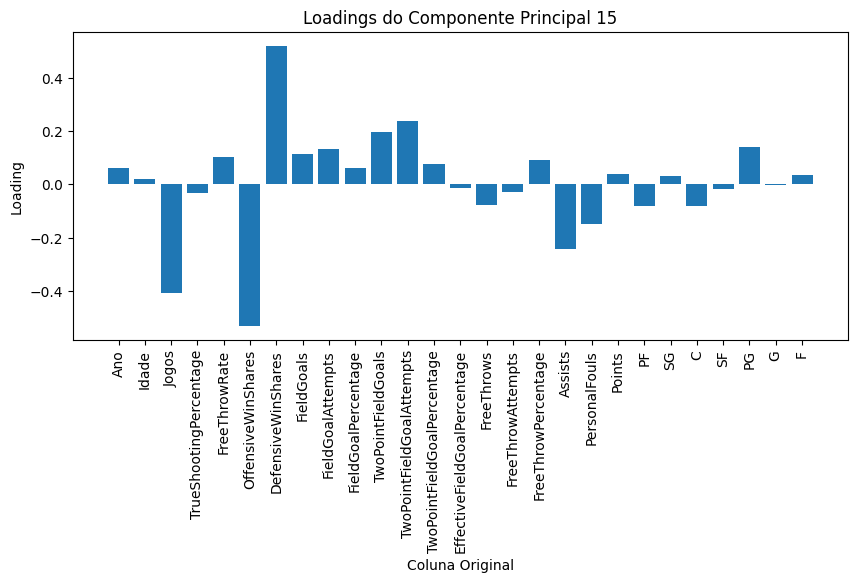

In [31]:
# Suponha que 'loadings_df' contenha os loadings das colunas originais
n_components = 15  # Número de componentes principais a serem visualizados

# Plote os loadings dos primeiros 'n_components' componentes principais
for i in range(n_components):
    plt.figure(figsize=(10, 4))
    plt.bar(loadings_df.columns, loadings_df.iloc[i, :], align='center')
    plt.xticks(loadings_df.columns, rotation=90)
    plt.xlabel('Coluna Original')
    plt.ylabel('Loading')
    plt.title(f'Loadings do Componente Principal {i+1}')
    plt.show()



---


##**Teste de algoritmo de Regressão Linear**

In [37]:
#Treinando o modelo
model = LinearRegression()
model = model.fit(X_train,y_train)

In [38]:
y_pred = model.predict(X_test)

In [42]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Erro Quadrático Médio (MSE): {mse}')
print(f'Erro Médio Real(RMSE): {rmse}')
print(f'Coeficiente de Determinação (R²): {r2}')

Erro Quadrático Médio (MSE): 0.3710867841646483
Erro Médio Real(RMSE): 0.6091689290867093
Coeficiente de Determinação (R²): 0.9606587692650237


In [43]:
coefficients = model.coef_
intercept = model.intercept_

print('Coeficientes:', coefficients)
print('Intercepto:', intercept)

Coeficientes: [ 0.84473857 -0.06980762  0.10162705 -0.02419332  0.16620945 -0.04197834
 -0.01324141 -0.02878019  0.46749546  0.56795246 -0.09790397 -0.1316649
 -0.01209682  1.79120882 -0.4827848 ]
Intercepto: 2.4813587212221764


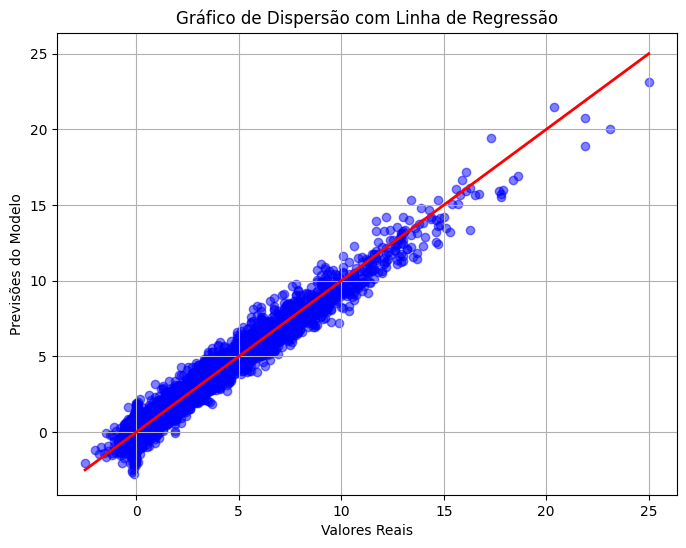

In [44]:
# Gráfico de dispersão com a linha de regressão
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões do Modelo')
plt.title('Gráfico de Dispersão com Linha de Regressão')
plt.grid(True)
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------------------------
## **Teste de algoritmo de Regressão de Árvore de Decisão**

In [49]:
model2 = DecisionTreeRegressor()
model2.fit(X_train, y_train)

DecisionTreeRegressor()

In [50]:
y_pred2 = model2.predict(X_test)

In [51]:
mse_2 = mean_squared_error(y_test, y_pred2)
rmse_2 = np.sqrt(mse_2)
r2_2 = r2_score(y_test, y_pred2)

print(f'Erro Quadrático Médio (MSE): {mse_2}')
print(f'Erro Médio Real(RMSE): {rmse_2}')
print(f'Coeficiente de Determinação (R²): {r2_2}')

Erro Quadrático Médio (MSE): 0.599606027637207
Erro Médio Real(RMSE): 0.7743423194151324
Coeficiente de Determinação (R²): 0.9364320151242801


##**Resultado**
O algoritmo de Regressão Linear apresentou um coeficiente de determinação (R²) de 0,9606 significa que o modelo é capaz de explicar 96,06% da variabilidade nos dados de destino e um erro médio (RMSE) de 0,61 o que indica que as previsões do modelo estão muito próximas dos valores reais. Enquanto o modelo de Regressão de árvore de descisão apresentou um R² = 0.9364 e RMSE = 0.7743, maior quando comparado ao algoritmo de regressão linear, dentre os dois modelos testados o que apresentou melhores resultados foi o de Regressão Linear